In [178]:
"""Working with table data, base EDA and matplotlib."""

'Working with table data, base EDA and matplotlib.'

In [179]:
# import main libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [180]:
df = pd.read_csv('S02-hw-dataset.csv')

# Вывод базовых статистик

In [181]:
df.head() # Overview of the upper part of the dataset

,user_id,age,country,purchases,revenue
0,1,25.0,FR,7,749
1,2,24.0,RU,5,1115
2,3,52.0,FR,7,399
3,4,31.0,RU,6,654
4,5,NaN,DE,6,1296


In [182]:
df.info() # overview of columns with their data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   user_id    41 non-null     int64  
 1   age        39 non-null     float64
 2   country    41 non-null     object 
 3   purchases  41 non-null     int64  
 4   revenue    41 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 1.7+ KB


In [183]:
df.describe() # basic statistics on the dataset

,user_id,age,purchases,revenue
count,41.000000,39.000000,41.000000,41.000000
mean,20.243902,36.512821,4.829268,820.048780
std,11.659289,18.304259,2.710189,613.127269
min,1.000000,5.000000,-1.000000,0.000000
25%,10.000000,24.000000,3.000000,432.000000
50%,20.000000,33.000000,5.000000,693.000000
75%,30.000000,45.500000,7.000000,1115.000000
max,40.000000,120.000000,11.000000,2475.000000


# Omissions, duplicates and base control of quality

In [184]:
df.isna().mean() # calculate the share of Na occurrences

user_id      0.00000
age          0.04878
country      0.00000
purchases    0.00000
revenue      0.00000
dtype: float64

**``as we can see, the column 'age' has about 5% Na occurrences``**

In [185]:
df.duplicated() # in the duplicates rows we see True value

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
40     True
dtype: bool

**``i founded method, where we can see only duplicates in the dataset:``**

In [186]:
df[df.duplicated(keep=False)]

,user_id,age,country,purchases,revenue
9,10,24.0,RU,7,511
40,10,24.0,RU,7,511


In [187]:
mask_non_negative_numbers = (df[['user_id', 'age', 'purchases', 'revenue']] < 0).any(axis=1)
df[mask_non_negative_numbers]

,user_id,age,country,purchases,revenue
5,6,120.0,FR,-1,785


In [188]:
mask_non_valid_age = (df['age'] > 100) | (df['age'] < 18)
df[mask_non_valid_age]

,user_id,age,country,purchases,revenue
5,6,120.0,FR,-1,785
20,21,5.0,RU,8,1488


In [189]:
mask_non_valid_data = (df['revenue'] == 0) & (df['purchases'] != 0)
df[mask_non_valid_data]

,user_id,age,country,purchases,revenue
10,11,24.0,US,4,0


---
# In the summary of checking values in the dataset we have 3 non-valid rows and 1 critical row:
- The first one is duplicate at 9 and 40 numbers
- The second one is row, which has negative count of purchases(-1) and non valid age(120)
- The third row has 4 purchases, but has 0 value of revenue, non valid
- critical row: row with number 20 has age value 5 that hardly can be true, but it can

# Basic EDA: groups, aggregations and frequencies

In [190]:
# let's find frequencies:
df['country'].value_counts()

country
RU    13
FR    12
US     8
DE     6
CN     2
Name: count, dtype: int64

In [191]:
country_group = df.groupby('country')
country_group.size() # Counts of categories

country
CN     2
DE     6
FR    12
RU    13
US     8
dtype: int64

In [192]:
country_group.mean() # mean of entries

,user_id,age,purchases,revenue
country,,,,
CN,10.000000,24.000000,4.500000,1054.000000
DE,24.666667,34.600000,6.500000,1445.500000
FR,20.666667,46.250000,4.250000,675.916667
RU,18.076923,30.076923,4.769231,790.076923
US,22.375000,36.714286,4.625000,557.375000


In [193]:
country_group.sum() # Sum of entries

,user_id,age,purchases,revenue
country,,,,
CN,20,48.0,9,2108
DE,148,173.0,39,8673
FR,248,555.0,51,8111
RU,235,391.0,62,10271
US,179,257.0,37,4459


In [194]:
# additional groups by age intervals using bins:
age_bins = [0, 18, 35, 50, 65, 100]
age_labels = ['0-18', '19-35', '36-50', '51-65', '65+']

df['age_group'] = pd.cut(
    df['age'],
    bins=age_bins,
    labels=age_labels,
    right=False # Left part included, right - non-included
    )

df['age_group']

0     19-35
1     19-35
2     51-65
3     19-35
4       NaN
5       NaN
6     36-50
7     19-35
8     36-50
9     19-35
10    19-35
11    19-35
12      NaN
13    36-50
14    51-65
15    19-35
16    19-35
17    19-35
18    36-50
19    19-35
20     0-18
21    19-35
22    36-50
23    19-35
24    19-35
25    36-50
26    51-65
27    36-50
28    36-50
29    51-65
30    51-65
31    19-35
32    19-35
33    19-35
34    36-50
35    51-65
36    19-35
37    36-50
38    36-50
39    19-35
40    19-35
Name: age_group, dtype: category
Categories (5, object): ['0-18' < '19-35' < '36-50' < '51-65' < '65+']

In [195]:
age_analysis = df.groupby('age_group').agg(
    customer_count=('user_id', 'count'),
    avg_spend=('revenue', 'mean'),
    total_spend=('revenue', 'sum'),
    min_age=('age', 'min'),
    max_age=('age', 'max')
).round(2)
age_analysis

C:\Users\vgutu\AppData\Local\Temp\ipykernel_7752\2456440477.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_analysis = df.groupby('age_group').agg(


,customer_count,avg_spend,total_spend,min_age,max_age
age_group,,,,,
0-18,1,1488.00,1488,5.0,5.0
19-35,20,813.35,16267,18.0,34.0
36-50,11,870.55,9576,35.0,47.0
51-65,6,596.67,3580,51.0,57.0
65+,0,NaN,0,NaN,NaN


---
- People from France and Russia dominates, 19-35 aged people dominated too
- People in the 36-50 age group spend the most on average
- but people in the 19-35 age group is most profitable because of customers count
- avg spend is very big in the 0-18 age category, but this row may be error or outlier

# Visualization of data in Matplotlib

---
# 1. гистограмма для количественного признака:

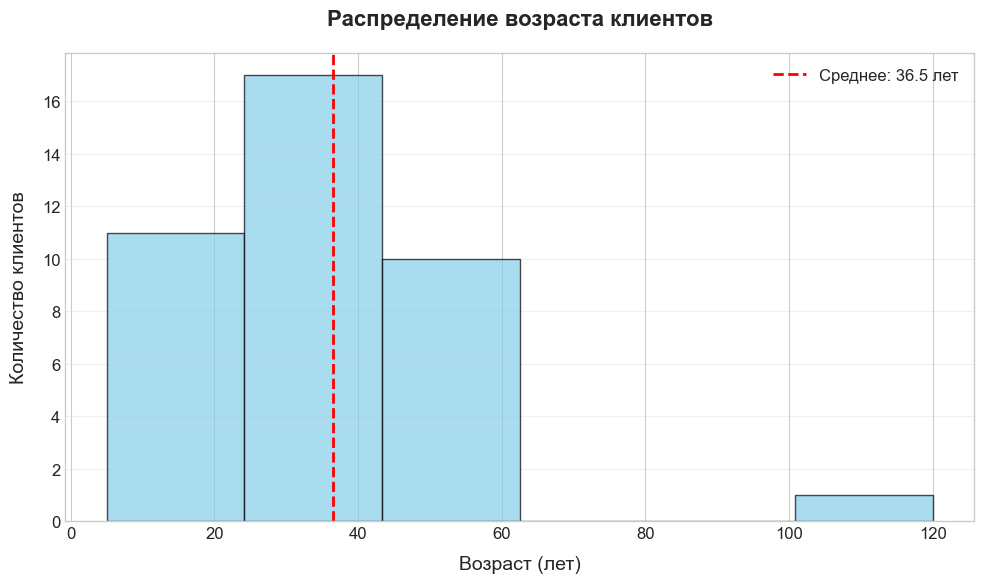

In [196]:
plt.style.use('seaborn-v0_8-whitegrid')  # Современный стиль
plt.rcParams['figure.figsize'] = (10, 6)  # Размер по умолчанию
plt.rcParams['font.size'] = 12

plt.figure(figsize=(10, 6))
n_bins = int(np.sqrt(len(df['age'])))  # Простое правило: sqrt(n)
plt.hist(df['age'], bins=n_bins, color='skyblue', edgecolor='black', alpha=0.7)

plt.title('Распределение возраста клиентов', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Возраст (лет)', fontsize=14, labelpad=10)
plt.ylabel('Количество клиентов', fontsize=14, labelpad=10)
plt.grid(axis='y', alpha=0.3)

# Добавляем вертикальную линию для среднего значения
plt.axvline(df['age'].mean(), color='red', linestyle='dashed', linewidth=2, 
            label=f'Среднее: {df["age"].mean():.1f} лет')
plt.legend()

plt.tight_layout()
plt.savefig('figures/age_histogram.png', dpi=300, bbox_inches='tight')
plt.show()

"""В среднем количество клиентов располагается в диапазоне 36 лет"""

# 2. БОКСПЛОТ ДЛЯ КОЛИЧЕСТВЕННОГО ПРИЗНАКА ПО ГРУППАМ

In [197]:
# Очищаем данные от выбросов и пропусков для визуализации
# Удаляем строку с аномальным возрастом (120) и пропущенным возрастом
clean_data = df.copy()
clean_data = clean_data[(clean_data['age'] < 100) & (clean_data['age'].notna())]
# Удаляем отрицательное количество покупок
clean_data = clean_data[clean_data['purchases'] >= 0]

# 1. Boxplot для количественного признака (age) по группам стран
plt.figure(figsize=(12, 6))
sns.boxplot(x='country', y='age', data=clean_data)
plt.title('Распределение возраста пользователей по странам', fontsize=14)
plt.xlabel('Страна', fontsize=12)
plt.ylabel('Возраст', fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.savefig('figures/boxplot_age_by_country.png', bbox_inches='tight', dpi=300)
plt.close()

"""
Комментарий к boxplot:
График показывает распределение возраста пользователей по разным странам (FR, RU, DE, CN, US).
Можно наблюдать, что:
- Во Франции (FR) медианный возраст около 30 лет с небольшим разбросом
- В России (RU) медианный возраст около 30 лет, но с большим разбросом данных
- В Китае (CN) и США (US) представлено по одному пользователю
- В Германии (DE) также один пользователь
Основной вывод: возраст пользователей в выборке варьируется от ~24 до ~52 лет, 
при этом основные группы (FR и RU) имеют схожий медианный возраст.
"""

# 3. Scatter plot для пары количественных признаков (purchases vs revenue)

In [198]:
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(
    data=clean_data, 
    x='purchases', 
    y='revenue', 
    hue='country',
    s=100,
    alpha=0.8,
    palette='viridis'
)

plt.title('Зависимость дохода от количества покупок по странам', fontsize=14)
plt.xlabel('Количество покупок', fontsize=12)
plt.ylabel('Доход (revenue)', fontsize=12)
plt.legend(title='Страна')
plt.grid(alpha=0.3)
plt.savefig('figures/scatter_purchases_revenue.png', bbox_inches='tight', dpi=300)
plt.close()

"""
Комментарий к scatter plot:
График показывает зависимость между количеством покупок и доходом (revenue) с разбивкой по странам.
Ключевые наблюдения:
- В целом наблюдается положительная корреляция: больше покупок обычно означает больший доход
- Однако есть исключения: пользователь из Германии (DE) с 6 покупками принес самый высокий доход (1296)
- Пользователи из России (RU) показывают разный уровень дохода при одинаковом количестве покупок
- Есть точка с 0 покупок и 0 дохода (Россия), что логично
Вывод: количество покупок влияет на доход, но есть и другие факторы (возможно, стоимость товаров, лояльность клиентов).
"""